In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import random
from sklearn import linear_model, metrics, model_selection

In [2]:
def train_test(data):
    # control randomization for reproducibility
    np.random.seed(42)
    random.seed(42)
    train, test = model_selection.train_test_split(data)
    return train,test

In [3]:
def split(data):
    x_data = data.loc[:, train.columns != 'gardens']
    y_data = data['gardens']
    return x_data,y_data

In [4]:
def evaluate(model, train,test):
    x_train,y_train= split(train)
    x_test,y_test=split(test)
    model.fit(x_train, y_train)
    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)
    train_acc = metrics.accuracy_score(y_train, train_preds)
    test_acc = metrics.accuracy_score(y_test, test_preds)
    return train_acc, test_acc

In [36]:
#Load file
file_name = 'google_review_ratings.csv'
data = pd.read_csv(file_name)
data=data.drop(["User","Unnamed: 25"],axis=1)
columnList=[
    'churches',
    'resorts',
    'beaches',
    'parks',
    'theatres',
    'museums',
    'malls',
    'zoo',
    'restaurants',
    'pubs/bars',
    'local services',
    'burger/pizza shops',
    'hotels/other lodgings',
    'juice bars',
    'art galleries',
    'dance clubs',
    'swimming pools',
    'gyms',
    'bakeries',
    'beauty & spas',
    'cafes',
    'view points',
    'monuments',
    'gardens',
]
data.columns = columnList
data.fillna(0,inplace=True)
#convert local services to float
local_services_mean = data['local services'][data['local services'] != '2\t2.']
data['local services'][data['local services'] == '2\t2.'] = np.mean(local_services_mean.astype('float64'))
data['local services'] = data['local services'].astype('float64')

<ipython-input-36-2bfcb4a620db>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['local services'][data['local services'] == '2\t2.'] = np.mean(local_services_mean.astype('float64'))


In [37]:
pd.set_option('display.max_columns', 30)
data.describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,local services,burger/pizza shops,hotels/other lodgings,juice bars,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,2.550071,2.077958,2.125511,2.190861,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560469
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,1.381643,1.249411,1.406542,1.576686,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171840
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,0.780000,0.000000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,1.580000,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,2.000000,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,3.220000,2.282500,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


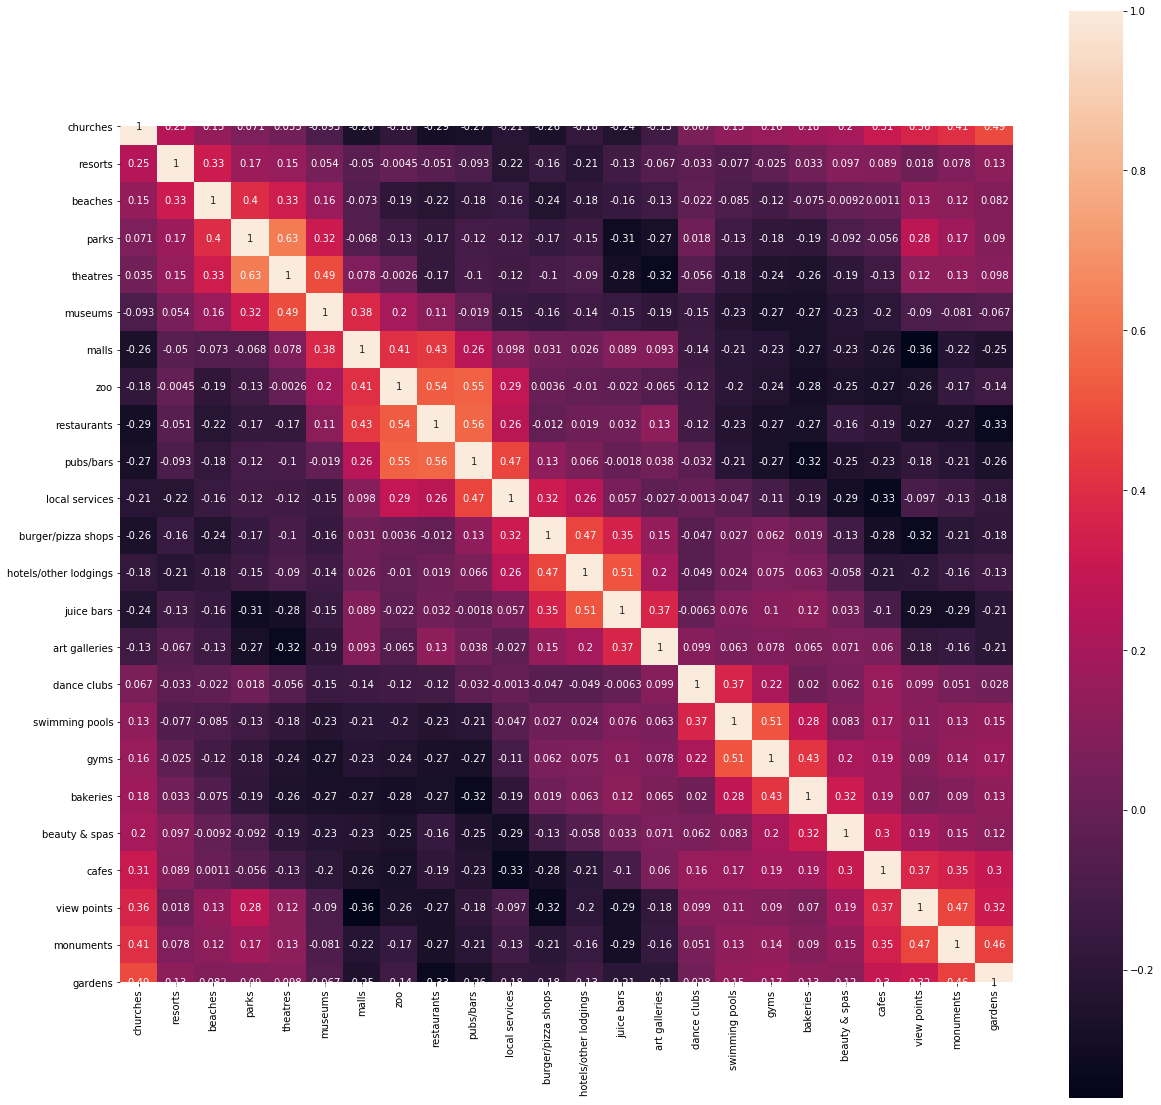

In [38]:
plt.figure(figsize=(20,20))
heatmap=sb.heatmap(data.corr(), square=True, annot=True)
plt.show()

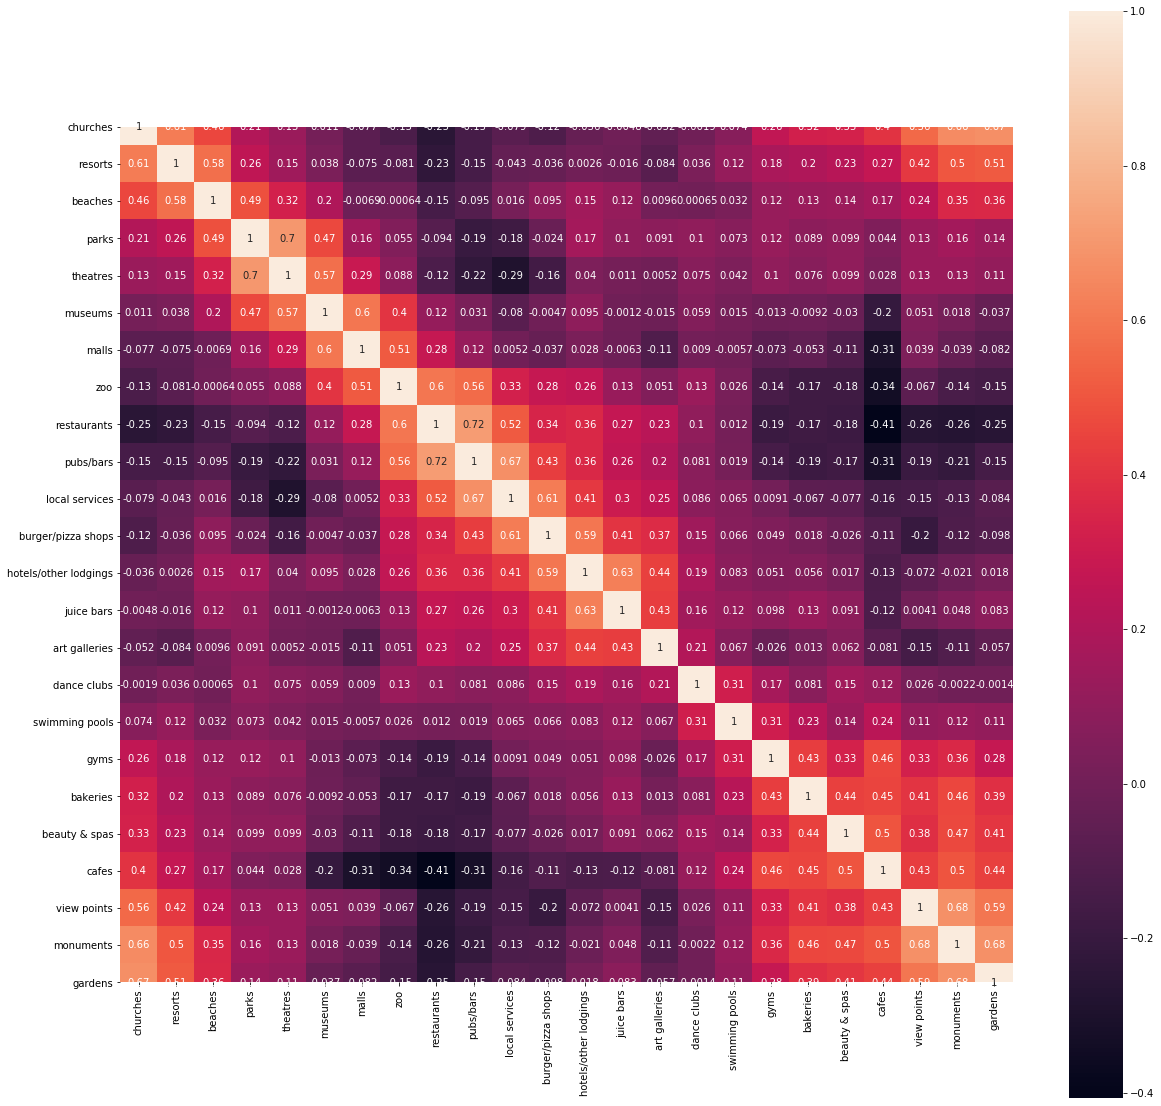

In [41]:
for column in columnList:
    data.loc[data[column] <=1.67, column] = -1
    data.loc[data[column] >=3.34, column] = 0
    data.loc[data[column] >=1.68, column] = 1
    
plt.figure(figsize=(20,20))
heatmap=sb.heatmap(data.corr(), square=True, annot=True)

In [42]:
train,test= train_test(data)
x_train,y_train=split(train)
x_test,y_test=split(test)

In [43]:
#linear regression
# declare variables
max_test_acc=0
min_test_acc=1
max_train_acc=0
min_train_acc=1
times=10

# start training model
for i in range(0,times):
    model_bl = linear_model.SGDClassifier(loss='log', max_iter=10000,tol=0.21)
    train_acc,test_acc =evaluate(model_bl, train,test)
    if(max_test_acc<test_acc):
        max_test_acc=test_acc
    if(min_test_acc>test_acc):
        min_test_acc=test_acc
    if(max_train_acc<train_acc):
        max_train_acc=train_acc
    if(min_train_acc>train_acc):
        min_train_acc=train_acc

print('Min train accuracy: '+ str(min_train_acc))
print('Max train accuracy: '+ str(max_train_acc))
print('------------------------------')
print('Min test accuracy: '+ str(min_test_acc))
print('Max test accuracy: '+ str(max_test_acc))

Min train accuracy: 0.8328445747800587
Max train accuracy: 0.8609481915933529
------------------------------
Min test accuracy: 0.8269794721407625
Max test accuracy: 0.8541055718475073


In [44]:
#logistic regression
# declare variables
max_test_acc=0
min_test_acc=1
max_train_acc=0
min_train_acc=1
times=10

# start training model
for i in range(0,times):
    x_train,y_train= split(train)
    x_test,y_test=split(test)
    clf = linear_model.LogisticRegression(multi_class="auto",solver="lbfgs" ,max_iter=100,penalty='l2')
    train_acc,test_acc = evaluate(clf, train,test)
    if(max_test_acc<test_acc):
        max_test_acc=test_acc
    if(min_test_acc>test_acc):
        min_test_acc=test_acc
    if(max_train_acc<train_acc):
        max_train_acc=train_acc
    if(min_train_acc>train_acc):
        min_train_acc=train_acc

print('Min train accuracy: '+ str(min_train_acc))
print('Max train accuracy: '+ str(max_train_acc))
print('------------------------------')
print('Min test accuracy: '+ str(min_test_acc))
print('Max test accuracy: '+ str(max_test_acc))

Min train accuracy: 0.8629032258064516
Max train accuracy: 0.8629032258064516
------------------------------
Min test accuracy: 0.8511730205278593
Max test accuracy: 0.8511730205278593


<ipython-input-58-e810e70b77e9>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWithUId['local services'][dataWithUId['local services'] == '2\t2.'] = np.mean(local_services_mean.astype('float64'))


Text(0.5, 1.0, 'Average rating per Category')

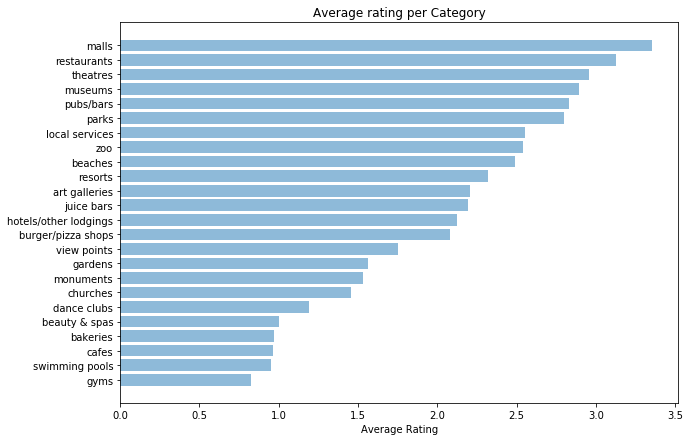

In [58]:
data = pd.read_csv(file_name)
dataWithUId=data.drop(["Unnamed: 25"],axis=1)
columnList=[
    'user id',
    'churches',
    'resorts',
    'beaches',
    'parks',
    'theatres',
    'museums',
    'malls',
    'zoo',
    'restaurants',
    'pubs/bars',
    'local services',
    'burger/pizza shops',
    'hotels/other lodgings',
    'juice bars',
    'art galleries',
    'dance clubs',
    'swimming pools',
    'gyms',
    'bakeries',
    'beauty & spas',
    'cafes',
    'view points',
    'monuments',
    'gardens',
]
dataWithUId.columns = columnList
dataWithUId.fillna(0,inplace=True)
#convert local services to float
local_services_mean = dataWithUId['local services'][dataWithUId['local services'] != '2\t2.']
dataWithUId['local services'][dataWithUId['local services'] == '2\t2.'] = np.mean(local_services_mean.astype('float64'))
dataWithUId['local services'] = dataWithUId['local services'].astype('float64')
avg_rating = dataWithUId[columnList[1:]].mean()
avg_rating = avg_rating.sort_values()
plt.figure(figsize=(10,7))
plt.barh(np.arange(len(columnList[1:])), avg_rating.values, align='center', alpha=0.5)
plt.yticks(np.arange(len(columnList[1:])), avg_rating.index)
plt.xlabel('Average Rating')
plt.title('Average rating per Category')

In [59]:
entertainment = ['theatres', 'dance clubs', 'malls']
food_travel = ['restaurants', 'pubs/bars', 'burger/pizza shops', 'juice bars', 'bakeries', 'cafes']
places_of_stay = ['hotels/other lodgings', 'resorts']
historical = ['churches', 'museums', 'art galleries', 'monuments']
nature = ['beaches', 'parks', 'zoo', 'view points', 'gardens']
services = ['local services','swimming pools', 'gyms', 'beauty & spas']

In [60]:
df_categories = pd.DataFrame(columns = ['entertainment', 'food_travel', 'places_of_stay', 'historical', 'nature', 'services'])

In [62]:
df_categories['entertainment'] = dataWithUId[entertainment].mean(axis=1)
df_categories['food_travel'] = dataWithUId[food_travel].mean(axis = 1)
df_categories['places_of_stay'] = dataWithUId[places_of_stay].mean(axis = 1)
df_categories['historical'] = dataWithUId[historical].mean(axis = 1)
df_categories['nature'] = dataWithUId[nature].mean(axis = 1)
df_categories['services'] = dataWithUId[services].mean(axis = 1)

In [63]:
df_categories.describe()

,entertainment,food_travel,places_of_stay,historical,nature,services
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,2.501045,2.027203,2.222609,2.021809,2.227604,1.330440
std,0.722411,0.549360,0.886588,0.584988,0.662531,0.580788
min,1.120000,0.721667,0.730000,0.557500,0.576000,0.205000
25%,1.963333,1.650000,1.470000,1.647500,1.762000,0.937500
50%,2.453333,2.027500,1.885000,1.977500,2.160000,1.245000
75%,2.916667,2.433750,3.160000,2.392500,2.656000,1.685000
max,5.000000,3.873333,5.000000,4.322500,4.520000,3.937500


In [64]:
#kNN recommendation
from sklearn.neighbors import NearestNeighbors
input_data_matrix = dataWithUId[columnList[1:]].values
knn_model = NearestNeighbors(n_neighbors=5).fit(input_data_matrix)

In [65]:
query_index = np.random.choice(dataWithUId[columnList[1:]].shape[0])
distances, indices = knn_model.kneighbors(dataWithUId[columnList[1:]].iloc[query_index, :].values.reshape(1,-1), n_neighbors = 5)

In [66]:
def compare_df(index, ind):        
    zero_cols_in = dataWithUId.loc[index].astype(bool)
    zero_df_in = pd.DataFrame(zero_cols_in[zero_cols_in == True]).reset_index(level = 0)
    in_wo_rating = zero_df_in['index']
    sug_user = dataWithUId.loc[ind]
    zero_cols_sug = sug_user.astype(bool)
    zero_df_sug = pd.DataFrame(zero_cols_sug[zero_cols_sug == True]).reset_index(level = 0)
    sug_wo_rating = zero_df_sug['index']
    sugg_list = list(set(sug_wo_rating) - set(in_wo_rating))
    return sugg_list

In [67]:
def recommend_knn(index):
    distances, indices = knn_model.kneighbors(dataWithUId[columnList[1:]].iloc[index, :].values.reshape(1,-1), n_neighbors = 10)
    distances = np.sort(distances)
    for i in range(0,len(indices[0])):
        ind = np.where(distances.flatten() == distances[0][i])[0][0]
        sug_list = compare_df(index, indices[0][i]) 
        if len(sug_list) > 0:
            break
    return sug_list

In [74]:
print(recommend_knn(16))

['swimming pools']


In [80]:
#using surprise scikit lib
from surprise import KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise import Reader
from surprise import Dataset
reader = Reader(rating_scale=(0, 5))
df = dataWithUId.replace(0, np.nan).set_index('user id', append=True).stack().reset_index().rename(columns={0:'rating', 'level_2':'itemID', 'user id':'userID'}).drop('level_0',1)
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.25, random_state = 12)
algo = KNNBasic()
algo = algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9006


0.9006350658528328

In [81]:
from collections import defaultdict
def get_top_n(predictions, n=5):
   
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

top_n = get_top_n(predictions, n=10)

In [82]:
#print for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

User 111 ['pubs/bars', 'local services', 'resorts', 'gardens', 'churches', 'view points', 'cafes']
User 42 ['malls', 'parks', 'beaches', 'pubs/bars', 'view points', 'burger/pizza shops', 'monuments']
User 2597 ['malls', 'parks', 'beaches', 'beauty & spas', 'hotels/other lodgings', 'swimming pools', 'churches', 'dance clubs']
User 2974 ['beaches', 'beauty & spas', 'swimming pools']
User 2830 ['museums', 'gardens', 'malls', 'churches', 'juice bars', 'gyms']
User 351 ['malls', 'local services', 'art galleries', 'bakeries', 'cafes']
User 280 ['local services', 'restaurants', 'zoo', 'juice bars', 'museums', 'art galleries', 'view points', 'gardens', 'churches']
User 1722 ['gyms', 'resorts', 'juice bars', 'beauty & spas', 'burger/pizza shops']
User 1406 ['local services', 'restaurants', 'pubs/bars', 'museums', 'theatres', 'juice bars', 'beaches', 'monuments']
User 3111 ['malls', 'local services', 'resorts', 'monuments', 'gardens', 'churches', 'bakeries', 'cafes']
User 1000 ['malls', 'juice b

User 5455 ['restaurants', 'malls', 'museums', 'pubs/bars', 'local services', 'zoo', 'juice bars', 'swimming pools']
User 5207 ['hotels/other lodgings', 'museums', 'beaches', 'dance clubs']
User 4193 ['hotels/other lodgings', 'view points', 'swimming pools']
User 2136 ['malls', 'monuments', 'pubs/bars', 'churches', 'gyms']
User 2067 ['malls', 'zoo', 'churches', 'dance clubs', 'beauty & spas', 'bakeries']
User 378 ['malls', 'art galleries', 'local services', 'museums', 'parks', 'burger/pizza shops', 'churches', 'cafes']
User 3803 ['restaurants', 'museums', 'juice bars', 'gyms']
User 5064 ['parks', 'beaches', 'resorts', 'dance clubs', 'gyms', 'beauty & spas']
User 4137 ['view points', 'parks', 'monuments', 'pubs/bars', 'resorts', 'burger/pizza shops', 'gardens', 'cafes', 'gyms']
User 292 ['view points', 'theatres', 'local services', 'monuments', 'malls', 'parks', 'pubs/bars', 'burger/pizza shops', 'art galleries', 'juice bars']
User 3130 ['malls', 'parks', 'local services', 'juice bars', 

User 161 ['pubs/bars', 'museums', 'resorts', 'churches', 'beauty & spas']
User 634 ['restaurants', 'malls', 'theatres', 'art galleries']
User 4432 ['bakeries', 'malls', 'juice bars', 'museums', 'monuments', 'zoo', 'swimming pools', 'burger/pizza shops', 'dance clubs']
User 4977 ['parks', 'beaches', 'resorts', 'local services', 'dance clubs', 'view points', 'cafes']
User 84 ['local services', 'gardens', 'resorts', 'hotels/other lodgings', 'art galleries', 'dance clubs', 'swimming pools']
User 5449 ['resorts', 'view points', 'restaurants', 'theatres', 'pubs/bars', 'bakeries']
User 1632 ['hotels/other lodgings', 'burger/pizza shops', 'parks', 'cafes', 'beauty & spas', 'bakeries']
User 3015 ['local services', 'restaurants', 'theatres', 'monuments']
User 2819 ['restaurants', 'local services', 'resorts', 'hotels/other lodgings']
User 5236 ['juice bars', 'hotels/other lodgings', 'art galleries', 'zoo', 'parks', 'bakeries', 'gardens']
User 2509 ['restaurants', 'malls', 'zoo', 'parks', 'gyms', 

User 2807 ['restaurants', 'view points', 'churches', 'pubs/bars', 'bakeries', 'juice bars', 'dance clubs', 'gyms']
User 1259 ['restaurants', 'beaches', 'hotels/other lodgings', 'churches', 'monuments', 'beauty & spas', 'cafes']
User 5435 ['beaches', 'parks', 'view points', 'bakeries', 'art galleries', 'pubs/bars', 'zoo', 'beauty & spas', 'burger/pizza shops', 'juice bars']
User 5235 ['burger/pizza shops', 'pubs/bars', 'theatres', 'parks', 'museums']
User 840 ['view points', 'cafes', 'beaches', 'theatres', 'museums', 'zoo', 'beauty & spas']
User 4866 ['theatres', 'malls', 'resorts', 'parks', 'zoo', 'art galleries', 'bakeries', 'cafes']
User 3052 ['parks', 'zoo', 'burger/pizza shops', 'resorts', 'churches', 'gardens', 'art galleries', 'swimming pools']
User 2333 ['beaches', 'beauty & spas']
User 2743 ['view points', 'monuments', 'malls', 'pubs/bars', 'juice bars', 'swimming pools']
User 57 ['malls', 'zoo', 'pubs/bars', 'local services', 'art galleries', 'monuments', 'cafes']
User 2055 ['

User 2529 ['art galleries', 'malls', 'gyms', 'swimming pools']
User 2768 ['zoo', 'juice bars', 'pubs/bars', 'cafes', 'dance clubs']
User 2847 ['beaches', 'restaurants', 'burger/pizza shops', 'art galleries', 'cafes']
User 3423 ['theatres', 'beaches', 'resorts', 'view points', 'juice bars', 'burger/pizza shops', 'gardens', 'swimming pools']
User 316 ['museums', 'theatres', 'beaches', 'gyms']
User 645 ['zoo', 'theatres', 'swimming pools', 'juice bars', 'beaches']
User 2741 ['monuments', 'gardens', 'cafes', 'churches', 'zoo']
User 1674 ['art galleries', 'malls', 'pubs/bars', 'burger/pizza shops', 'monuments']
User 2486 ['hotels/other lodgings', 'restaurants', 'bakeries', 'malls', 'museums', 'beaches', 'gyms']
User 1659 ['swimming pools', 'restaurants', 'local services', 'theatres', 'view points']
User 4214 ['theatres', 'zoo', 'art galleries', 'burger/pizza shops', 'gardens', 'beauty & spas']
User 2309 ['view points', 'dance clubs', 'swimming pools']
User 3941 ['beaches', 'pubs/bars', 'gym

User 4081 ['museums', 'beaches', 'view points']
User 993 ['malls', 'local services', 'juice bars', 'gardens', 'churches', 'monuments']
User 1252 ['resorts', 'juice bars', 'art galleries', 'museums', 'theatres', 'dance clubs']
User 752 ['burger/pizza shops', 'churches', 'beauty & spas']
User 1408 ['juice bars', 'burger/pizza shops', 'gardens', 'view points', 'bakeries']
User 3079 ['theatres', 'restaurants', 'malls', 'hotels/other lodgings', 'bakeries']
User 2750 ['gardens', 'cafes', 'art galleries', 'beauty & spas', 'juice bars', 'local services', 'zoo', 'hotels/other lodgings', 'burger/pizza shops']
User 3528 ['malls', 'pubs/bars', 'dance clubs', 'parks', 'theatres', 'swimming pools', 'cafes', 'view points', 'gyms', 'beauty & spas']
User 3189 ['juice bars', 'beaches', 'hotels/other lodgings']
User 5421 ['parks', 'museums', 'view points', 'churches', 'bakeries', 'art galleries', 'hotels/other lodgings', 'dance clubs']
User 1600 ['parks', 'museums', 'bakeries', 'gardens']
User 3763 ['res

User 2679 ['malls', 'view points', 'gardens', 'pubs/bars', 'art galleries', 'cafes']
User 5393 ['monuments', 'resorts', 'theatres', 'hotels/other lodgings']
User 2434 ['museums', 'theatres', 'parks', 'resorts', 'hotels/other lodgings', 'gyms']
User 2963 ['restaurants', 'pubs/bars', 'museums']
User 2026 ['malls', 'museums', 'resorts', 'dance clubs', 'swimming pools']
User 2888 ['resorts', 'juice bars', 'parks', 'view points']
User 1503 ['pubs/bars', 'juice bars', 'resorts', 'gardens']
User 4181 ['juice bars', 'local services', 'gardens', 'bakeries', 'gyms']
User 1295 ['beaches', 'view points', 'beauty & spas']
User 1749 ['theatres', 'bakeries']
User 543 ['museums', 'zoo', 'hotels/other lodgings', 'gardens', 'view points', 'art galleries', 'gyms', 'beauty & spas']
User 3106 ['pubs/bars', 'restaurants', 'museums', 'view points', 'churches', 'swimming pools']
User 784 ['juice bars']
User 3645 ['pubs/bars', 'burger/pizza shops', 'hotels/other lodgings']
User 3975 ['resorts', 'zoo']
User 334